### Biopython PDB Module Example

In [1]:
from Bio.PDB.PDBList import PDBList
from Bio.PDB.PDBParser import PDBParser

In [14]:
# Download PDB file for 1ubq (structure of ubiquitin)
pdb_list = PDBList()
pdb_list.download_pdb_files(pdb_codes=["1ubq"],pdir=".",file_format="pdb")

Structure exists: '.\pdb1ubq.ent' 


In [2]:
# PDBParser class to parse structure files
p = PDBParser()
structure = p.get_structure("ubiquitin", "pdb1ubq.ent")
ca_list = []
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                if atom.get_name() == "CA":
                    # Add all carbon alpha atoms to a list in order
                    ca_list.append(atom) 

In [16]:
from Bio.PDB.vectors import calc_angle, calc_dihedral
distances = []
# Calculate distances for all two consecutive carbon alpha atoms
for i in range(len(ca_list)-1):
    distance = ca_list[i] - ca_list[i+1]
    distances.append(distance)

bond_angles = []
# Calculate bond angles for all three consecutive carbon alpha atoms
for i in range(len(ca_list)-2):
    vector1 = ca_list[i].get_vector()
    vector2 = ca_list[i+1].get_vector()
    vector3 = ca_list[i+2].get_vector()
    bond_angle = calc_angle(vector1, vector2, vector3)
    bond_angles.append(bond_angle)

dihedral_angles = []
# Calculate dihedral angles for all four consecutive carbon alpha atoms
for i in range(len(ca_list)-3):
    vector1 = ca_list[i].get_vector()
    vector2 = ca_list[i+1].get_vector()
    vector3 = ca_list[i+2].get_vector()
    vector4 = ca_list[i+3].get_vector()
    dihedral_angle = calc_dihedral(vector1, vector2, vector3,vector4)
    dihedral_angles.append(dihedral_angle)

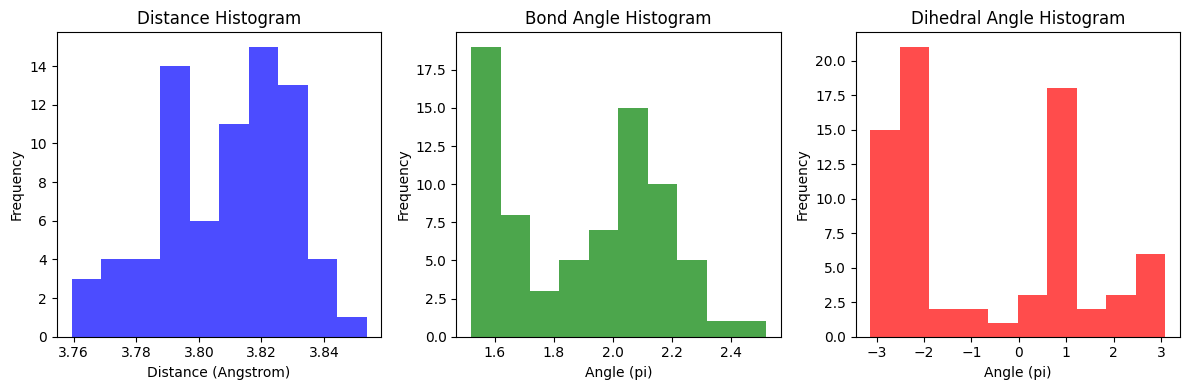

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the histogram

# Create histograms for distances, bond angles and dihedral angles
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(distances, bins=10, color='blue', alpha=0.7)
axes[0].set_title('Distance Histogram')
axes[0].set_xlabel('Distance (Angstrom)')
axes[0].set_ylabel('Frequency')

axes[1].hist(bond_angles, bins=10, color='green', alpha=0.7)
axes[1].set_title('Bond Angle Histogram')
axes[1].set_xlabel('Angle (pi)')
axes[1].set_ylabel('Frequency')

axes[2].hist(dihedral_angles, bins=10, color='red', alpha=0.7)
axes[2].set_xlabel('Angle (pi)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Dihedral Angle Histogram')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Finally, the structure can be viewed with the nglview, which is a Jupyter/IPython widget to interactively view molecular structures and trajectories. 

In [3]:
import nglview as nv
nv.show_biopython(structure, gui=True)

NGLWidget()